**Trayectoria con resistencia al aire**

Ecuación de la fuerza:

\begin{equation}
F=\frac{1}{2}\pi R^{2}\rho Cv^{2}
\end{equation}

\begin{equation}
R \equiv Radio \ de \ la \ esfera
\end{equation}

\begin{equation}
\rho \equiv \ Densidad \ del \ aire
\end{equation}

\begin{equation}
C \equiv \ Coeficiente \ de \ arrastre
\end{equation}

\begin{equation}
v \equiv \ Velocidad \ de \ la \ bala
\end{equation}

De la segunda ley de Newton tenemos:

\begin{equation}
m\vec{a}=\sum \vec{F}
\end{equation}

la Fuerza se opone a la velocidad, por tanto el vector F tendra una dirección tangente a la trayectoria y opuesta a la del vector velocidad:

\begin{equation}
\vec{F}=-\frac{F}{v}\vec{v}
\end{equation}

Asi podemos ecribir la segunda ley de Newton para luego despejar las compoenentes de la aceleracion en x e y:

\begin{equation}
ma_{x}=F_{x}= -\frac{1}{2}\pi R^{2}\rho Cv v_{x}
\end{equation}

\begin{equation}
ma_{y}=-mg-F_{y}= -mg -\frac{1}{2}\pi R^{2}\rho Cv v_{y}
\end{equation}

Usando la notacion de Newton:

\begin{equation}
v_{x}=\dot{x}
\end{equation}

\begin{equation}
v_{y}=\dot{y}
\end{equation}

\begin{equation}
a_{x}=\ddot{x}
\end{equation}

\begin{equation}
a_{y}=\ddot{y}
\end{equation}

con lo anterior ademas, podemos escribir las dos ecuaciones de segundo orden como cuatro ecuaciones de primer orden para usar el método de Runge-kutta 

teniendo encuenta ademas la magnitud de la velocidad:

\begin{equation}
v=\sqrt[]{\dot{x}^{2}+\dot{y}^{2}}
\end{equation}

Fianalmente remplazado optenemos las ecuaciones de movimiento:

\begin{equation}
\ddot{x}= -\frac{\pi R^{2}\rho C\dot{x}}{2m}\sqrt[]{\dot{x}^{2}+\dot{y}^{2}}
\end{equation}

\begin{equation}
\ddot{y}= -g-\frac{\pi R^{2}\rho C\dot{y}}{2m}\sqrt[]{\dot{x}^{2}+\dot{y}^{2}}
\end{equation}




In [1]:
from math import sin,pi,cos,sqrt
from numpy import array,arange
from pylab import plot, xlabel,ylabel, show,legend,grid,title

In [2]:
#constantes
m= 1 #kg
rho = 1.22 #kg/m^3
R = 0.08 #m
C = 0.47
g = 9.8 #m/s^2

#La función recibe como parámetros un arreglo A que contiene los valores iniciales de las velocidades y las posiciones y la masa de la bala 
# además recibe el parámetro temporal, retorna en cada paso un arreglo con el valor siguiente de velocidades y aceleraciones 
def f(A,t,m): 
    x = A[0]
    vx = A[1]
    y = A[2]
    vy = A[3]
    fvx = -pi*(R**2)*rho*C*vy*sqrt(vx**2 + vy**2)/2*m
    fvy = -g-pi*(R**2)*rho*C*vy*sqrt(vx**2 + vy**2)/2*m
    return array ([vx,fvx,vy,fvy],float)

El tiempo de vuelo para un tiro parabólico ideal sigue la ecuación:

\begin{equation}
t=\frac{2v_{0}sen\theta }{g}
\end{equation}

Teniendo en cuenta nuestros valores iniciales

\begin{equation}
t=\frac{2*100sen(30)}{9.8}
\end{equation}

\begin{equation}
t=10.2 s
\end{equation}

Podemos usar este tiempo para observar cómo cambia el alcance  teniendo en cuenta el coeficiente de arrastre

In [3]:
def funcion(m):   # definimos un función que resuelve la ecuacion diferencial para diferentes masas por eso resive a m como parametro
   
    ti = 0       #tiempo inicial
    tf = 10.2    #tiempo final
    N=1000       #numero de paso
    h=(tf-ti)/N  #tamaño del paso

    #valores iniciales
    v = 100 #m/s   #magnitud de la velocidad inicial
    theta = (30*pi)/180 #grados   #angulo de disparo
    vx0 = v*cos(theta)        #magnitud de la velocidad en dirrecion x
    vy0 = v*sin(theta)        #magnitud de la velocidad en dirrecion y
    x0=0               #posiciín inicial en x
    y0=0               #posiciín inicial en y

    tpoints = arange(ti, tf, h)    # lista que contiene la variable temporal
    xpoints = []             # arreglo vacio que se llenara con las posiciones en x 
    ypoints = []             # arreglo vacio que se llenara con las posiciones en y

    A = array([x0, vx0, y0, vy0], float)  #Arreglo que contiene lo valores iniciales y que se va llenando con los valores dados por el metodo RK4

    for t in tpoints:              #Implementamos el metodo RK4 mediante un cliclo for
        xpoints.append(A[0])       
        ypoints.append(A[2])
    
        k1 = h * f(A, t, m)
        k2 = h * f(A + 0.5 * k1, t + 0.5 * h, m)
        k3 = h * f(A + 0.5 * k2, t + 0.5 * h, m)
        k4 = h * f(A + k3, t + h, m)
        A += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
    return xpoints, ypoints  # la funcion retorna los datos de las posiciones en x e y en dos arreglos dinstintos.

El alcanze horizontal para un tiro parabolico es:
    
\begin{equation}
x_{max}=\frac{v_{0}^{2}sen(2\theta)}{g}
\end{equation}

\begin{equation}
x_{max}=\frac{100^{2}sen(60)}{9.8})=884 [m]
\end{equation}
    
    

In [4]:
X1,Y1 =funcion(m)  # Aplicamos la función para la masa de 1 kg   

In [5]:
lista1=[]     # definimos una lista vacia que guarda la posiciones en donde la posicion Y  vale 0
for i in range (len(X1)):  # calculamos la cordenada donde Y es cero que nos indica el alcanze horizontal
    if -0.09< Y1[i] <0.09:
        lista1.append(i)
        
Xmax = (X1[max(lista1)])  # alcanze maximo horizontal
print("Xmaximo = ", Xmax)

Xmaximo =  478.97317735844234


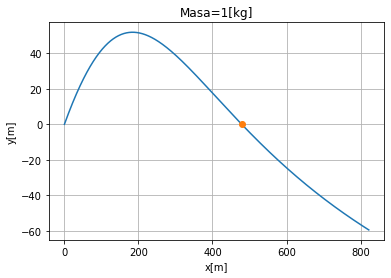

In [6]:
plot(X1,Y1)
plot(Xmax,Y1[max(lista1)], 'o')
plot()
xlabel('x[m]')
ylabel('y[m]')
title('Masa=1[kg]')
grid()
show()

Como se observa en la grafica de Y contra X el alcanze horizontal es mucho menor 478[m] cuando se tiene en cuenta el coeficiente de arrastre, comparado con los 884[m] del tiro parabolico ideal. Ahora observaremos que sucede al variar la masa de la bala de cañon.

In [7]:
# para una masa m = 2 kg
X2,Y2 =funcion(2)
lista2=[]
for i in range (len(X2)):  
    if -0.09< Y2[i] <0.09:
        lista2.append(i)
        
Xmax2=(X2[max(lista2)])  # alcanze maximo horizontal
print("Xmaximo = ", Xmax2)


Xmaximo =  393.7543219602294


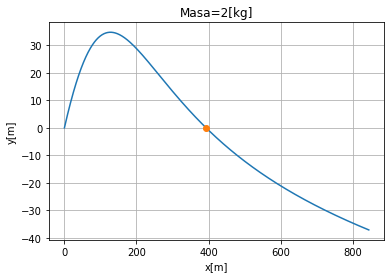

In [8]:
plot(X2,Y2)
plot(Xmax2,Y2[max(lista2)], 'o')
plot()
xlabel('x[m]')
ylabel('y[m]')
title('Masa=2[kg]')
grid()
show()


In [9]:
# para una masa m = 10 kg
X3,Y3 =funcion(10)
lista3 =[]

for i in range (len(X3)):  
    if -0.09< Y3[i] <0.09:
        lista3.append(i)
Xmax3=(X3[max(lista3)])  # alcanze maximo horizontal
print("Xmaximo = ", Xmax3)

Xmaximo =  303.521568589086


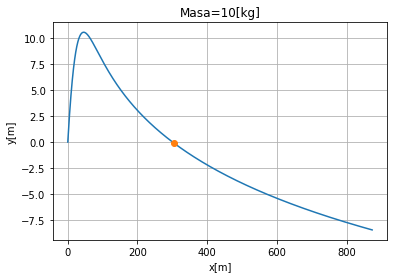

In [10]:
plot(X3,Y3)
plot(Xmax3,Y3[max(lista3)], 'o')
plot()
xlabel('x[m]')
ylabel('y[m]')
title('Masa=10[kg]')
grid()
show()

Hasta el momento hemos escogido masas mayores para la bala, y se ha observado que el alcanze horizontal se ve reducido, ahora veremos que sucede si la masa del proyectir se reduce

In [11]:
# para una masa m = 0.25kg
X4,Y4 =funcion(0.25)
lista4 =[]

for i in range (len(X4)):  
    if -0.09< Y4[i] <0.09:
        lista4.append(i)
Xmax4=(X4[max(lista4)])  # alcanze maximo horizontal
print("Xmaximo = ", Xmax4)

Xmaximo =  679.5172282121707


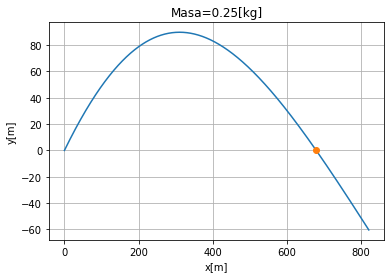

In [12]:
plot(X4,Y4)
plot(Xmax4,Y4[max(lista4)], 'o')
plot()
xlabel('x[m]')
ylabel('y[m]')
title('Masa=0.25[kg]')
grid()
show()

**Como observamos  ahora el alcanze aumento. Finalmente podemos concluir que cuando se ignora la resistencia del aire, la distancia recorrida por un proyectil no depende de la masa del proyectil. Sin embargo,resulta mas aproximado a la vida real considerar que la masa ciertamente marca la diferencia. Como observamos en los las graficas y en los datos, el alcanze maximo va disminuyendo a medida que aumenta la masa del proyectil.**